**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('Task 1 Data set/cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [4]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [7]:
params = {"max_depth":[3,6,9,12],"n_estimators":[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [10]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rf,param_grid= params,verbose=2)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [11]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.8s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.7s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.7s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.6s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   3.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.8s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] .

[CV] .................... max_depth=9, n_estimators=200, total=  19.3s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   1.6s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   1.8s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   1.2s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   1.0s
[CV] max_depth=12, n_estimators=10 ...................................
[CV] .................... max_depth=12, n_estimators=10, total=   1.4s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] .................... max_depth=12, n_estimators=50, total=   6.5s
[CV] max_depth=12, n_estimators=50 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  9.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                    

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [12]:
res = pd.DataFrame(gs.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.630107,0.097545,0.031544,0.016201,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.814390,0.819269,0.816925,0.824426,0.815284,0.818058,0.003590,11
1,2.313244,0.575667,0.068875,0.022420,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812046,0.815284,0.814346,0.820206,0.813408,0.815058,0.002788,15
2,4.343904,1.309452,0.102641,0.045071,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810640,0.812705,0.813408,0.820441,0.810830,0.813605,0.003580,16
3,8.367474,1.361084,0.307376,0.145091,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811577,0.815518,0.814346,0.821378,0.813408,0.815246,0.003326,14
4,0.372877,0.036321,0.010975,0.006231,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814390,0.818565,0.819972,0.826301,0.819503,0.819746,0.003825,10
5,1.729177,0.129757,0.037763,0.005736,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.815561,0.819034,0.819737,0.826067,0.820206,0.820121,0.003390,8
6,6.076999,1.731152,0.128357,0.062315,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.815796,0.819972,0.819503,0.827004,0.820206,0.820496,0.003628,3
7,12.481726,3.674550,0.178565,0.062029,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.815796,0.819972,0.819269,0.826770,0.820675,0.820496,0.003557,3
8,1.008996,0.400107,0.015627,0.013975,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.809702,0.815987,0.819972,0.824895,0.816221,0.817355,0.005008,12
9,4.933782,1.562277,0.106248,0.036175,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.815796,0.818565,0.819503,0.826301,0.819972,0.820027,0.003455,9


**Find the best hyperparameters from the cross-validation.**

In [13]:
gs.best_params_

{'max_depth': 12, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [14]:
# Create a 5x5 grid
x_1, y_1 = np.meshgrid(range(5), range(5))
print(x_1)
print(y_1)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [15]:
gs_mean_test = res["mean_test_score"].values.reshape(4,4)

In [16]:
gs_mean_test

array([[0.8180584 , 0.81505804, 0.81360475, 0.81524559],
       [0.81974616, 0.82012116, 0.82049621, 0.82049621],
       [0.81735538, 0.82002739, 0.82026178, 0.82054312],
       [0.81721443, 0.82049614, 0.82049621, 0.82077745]])

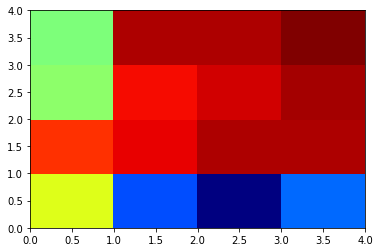

In [19]:
# Set color map to `plt.cm.jet`
ax = plt.axes()
pcolor_ex = ax.pcolormesh(x_1, y_1, gs_mean_test, cmap=plt.cm.jet)


Text(0, 0.5, 'Y coordinate')

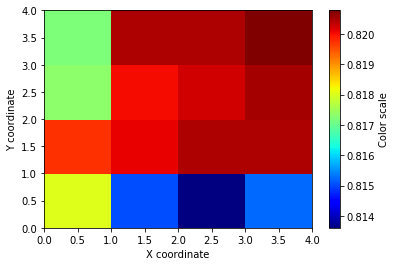

In [18]:
# Visualize pcolormesh
ax = plt.axes()
pcolor_ex = ax.pcolormesh(x_1, y_1, gs_mean_test, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [24]:
# Create a dataframe of the feature names and importance
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':gs.best_estimator_.feature_importances_
})
feat_imp_df

,Feature name,Importance
0,LIMIT_BAL,0.059877
1,EDUCATION,0.012451
2,MARRIAGE,0.007819
3,AGE,0.042871
4,PAY_1,0.304592
5,BILL_AMT1,0.053973
6,BILL_AMT2,0.052029
7,BILL_AMT3,0.048639
8,BILL_AMT4,0.046171
9,BILL_AMT5,0.043062


In [25]:
# Sort values by importance
feat_imp_df.sort_values('Importance', ascending=False)
feat_imp_df

,Feature name,Importance
0,LIMIT_BAL,0.059877
1,EDUCATION,0.012451
2,MARRIAGE,0.007819
3,AGE,0.042871
4,PAY_1,0.304592
5,BILL_AMT1,0.053973
6,BILL_AMT2,0.052029
7,BILL_AMT3,0.048639
8,BILL_AMT4,0.046171
9,BILL_AMT5,0.043062
